# Quickstart: Bandit Off-Policy Evaluation

This notebook runs a full bandit OPE workflow with an academic plotting style
and a self-contained report. We use the synthetic benchmark so the true policy
value is known for comparison.

In [1]:
from __future__ import annotations

from pathlib import Path

import numpy as np

from crl.benchmarks.bandit_synth import SyntheticBandit, SyntheticBanditConfig
from crl.ope import evaluate
from crl.viz import configure_notebook_display, save_figure

In [2]:
np.random.seed(0)
configure_notebook_display()

benchmark = SyntheticBandit(SyntheticBanditConfig(seed=0))
dataset = benchmark.sample(num_samples=1_000, seed=1)
true_value = benchmark.true_policy_value(benchmark.target_policy)

report = evaluate(
    dataset=dataset,
    policy=benchmark.target_policy,
    estimators=["is", "wis", "double_rl"],
)

summary = report.summary_table()
summary

,value,stderr,ci,diagnostics,warnings,metadata,estimator
0,-0.393095,0.038707,"(-0.4689600359090516, -0.3172303957405684)",{'overlap': {'min_behavior_prob': 0.1097201314...,[],"{'estimator': 'IS', 'num_samples': 1000}",IS
1,-0.396854,0.042185,"(-0.47953558159888593, -0.3141718825523601)",{'overlap': {'min_behavior_prob': 0.1097201314...,[],"{'estimator': 'WIS', 'num_samples': 1000}",WIS
2,-0.423104,0.030082,"(-0.48206487086077743, -0.36414260107394003)",{'overlap': {'min_behavior_prob': 0.1097201314...,[],"{'estimator': 'DoubleRL', 'config': {'num_fold...",DoubleRL


In [ ]:
print(
    summary[["estimator", "value", "lower_bound", "upper_bound"]]
    .round(3)
    .to_string(index=False)
)

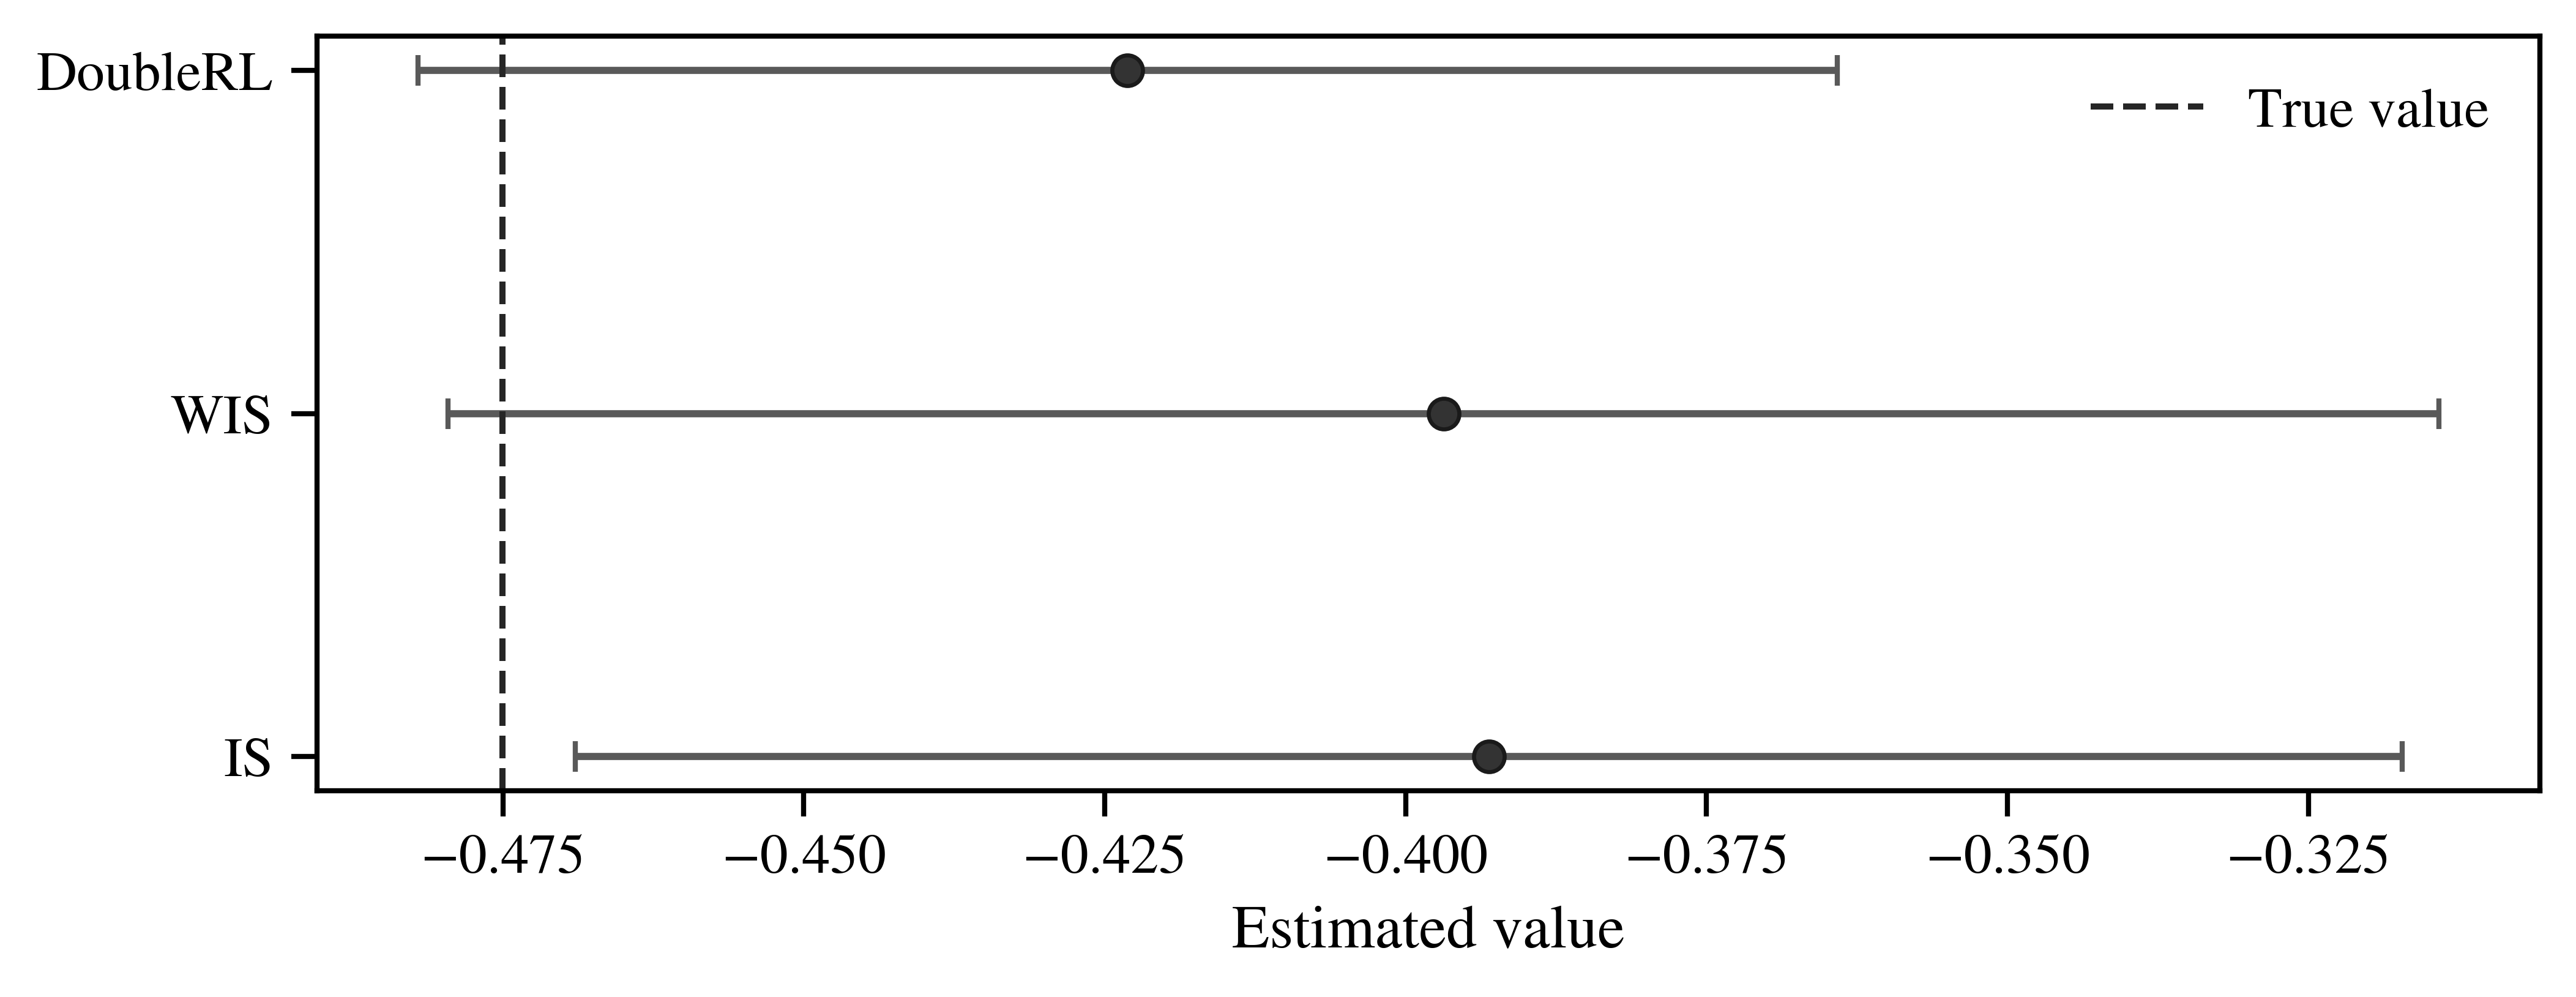

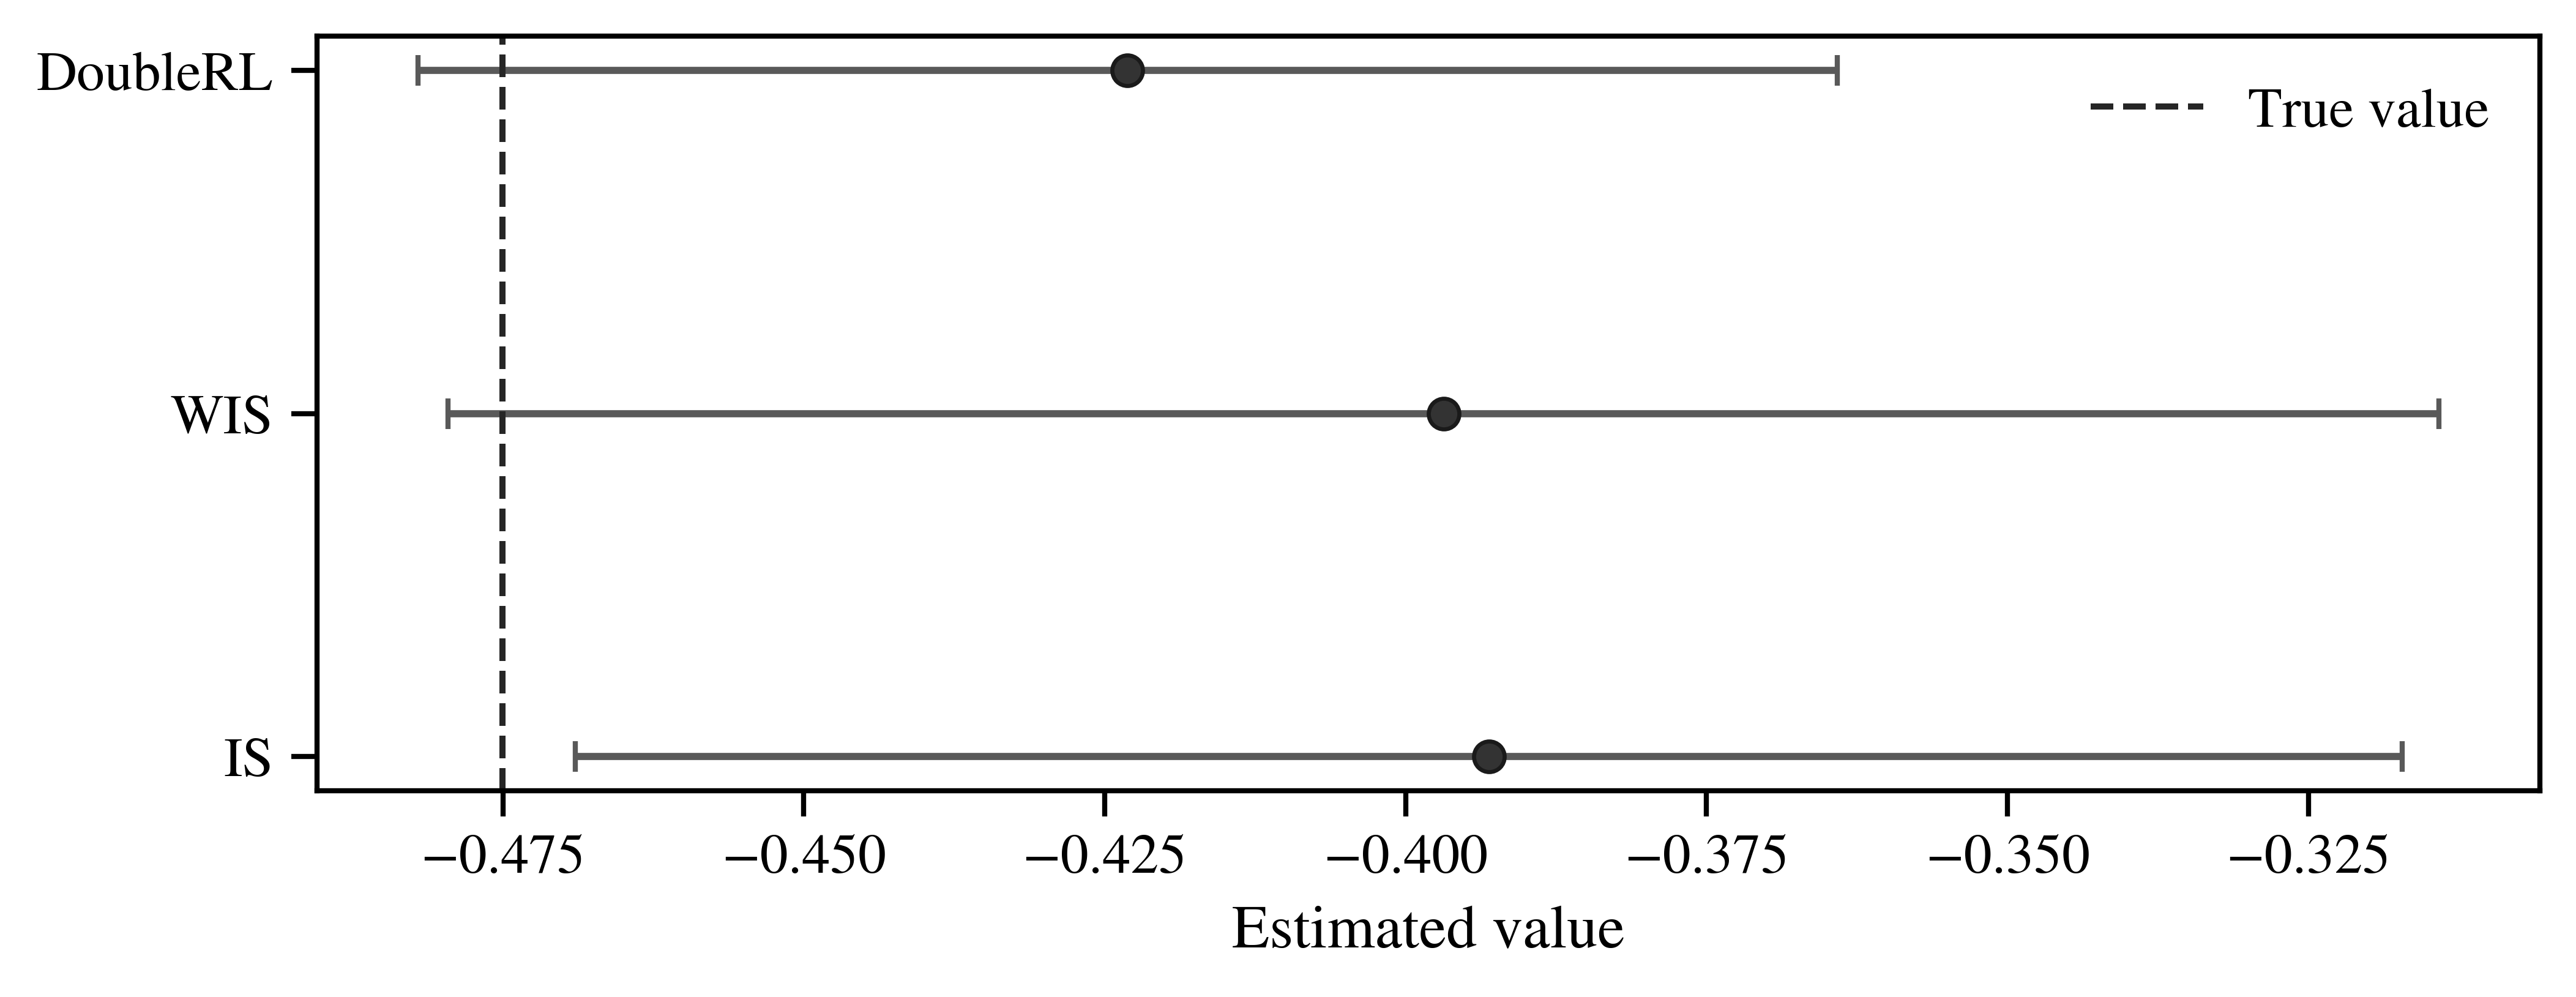

In [3]:
fig = report.plot_estimator_comparison(truth=true_value)
fig

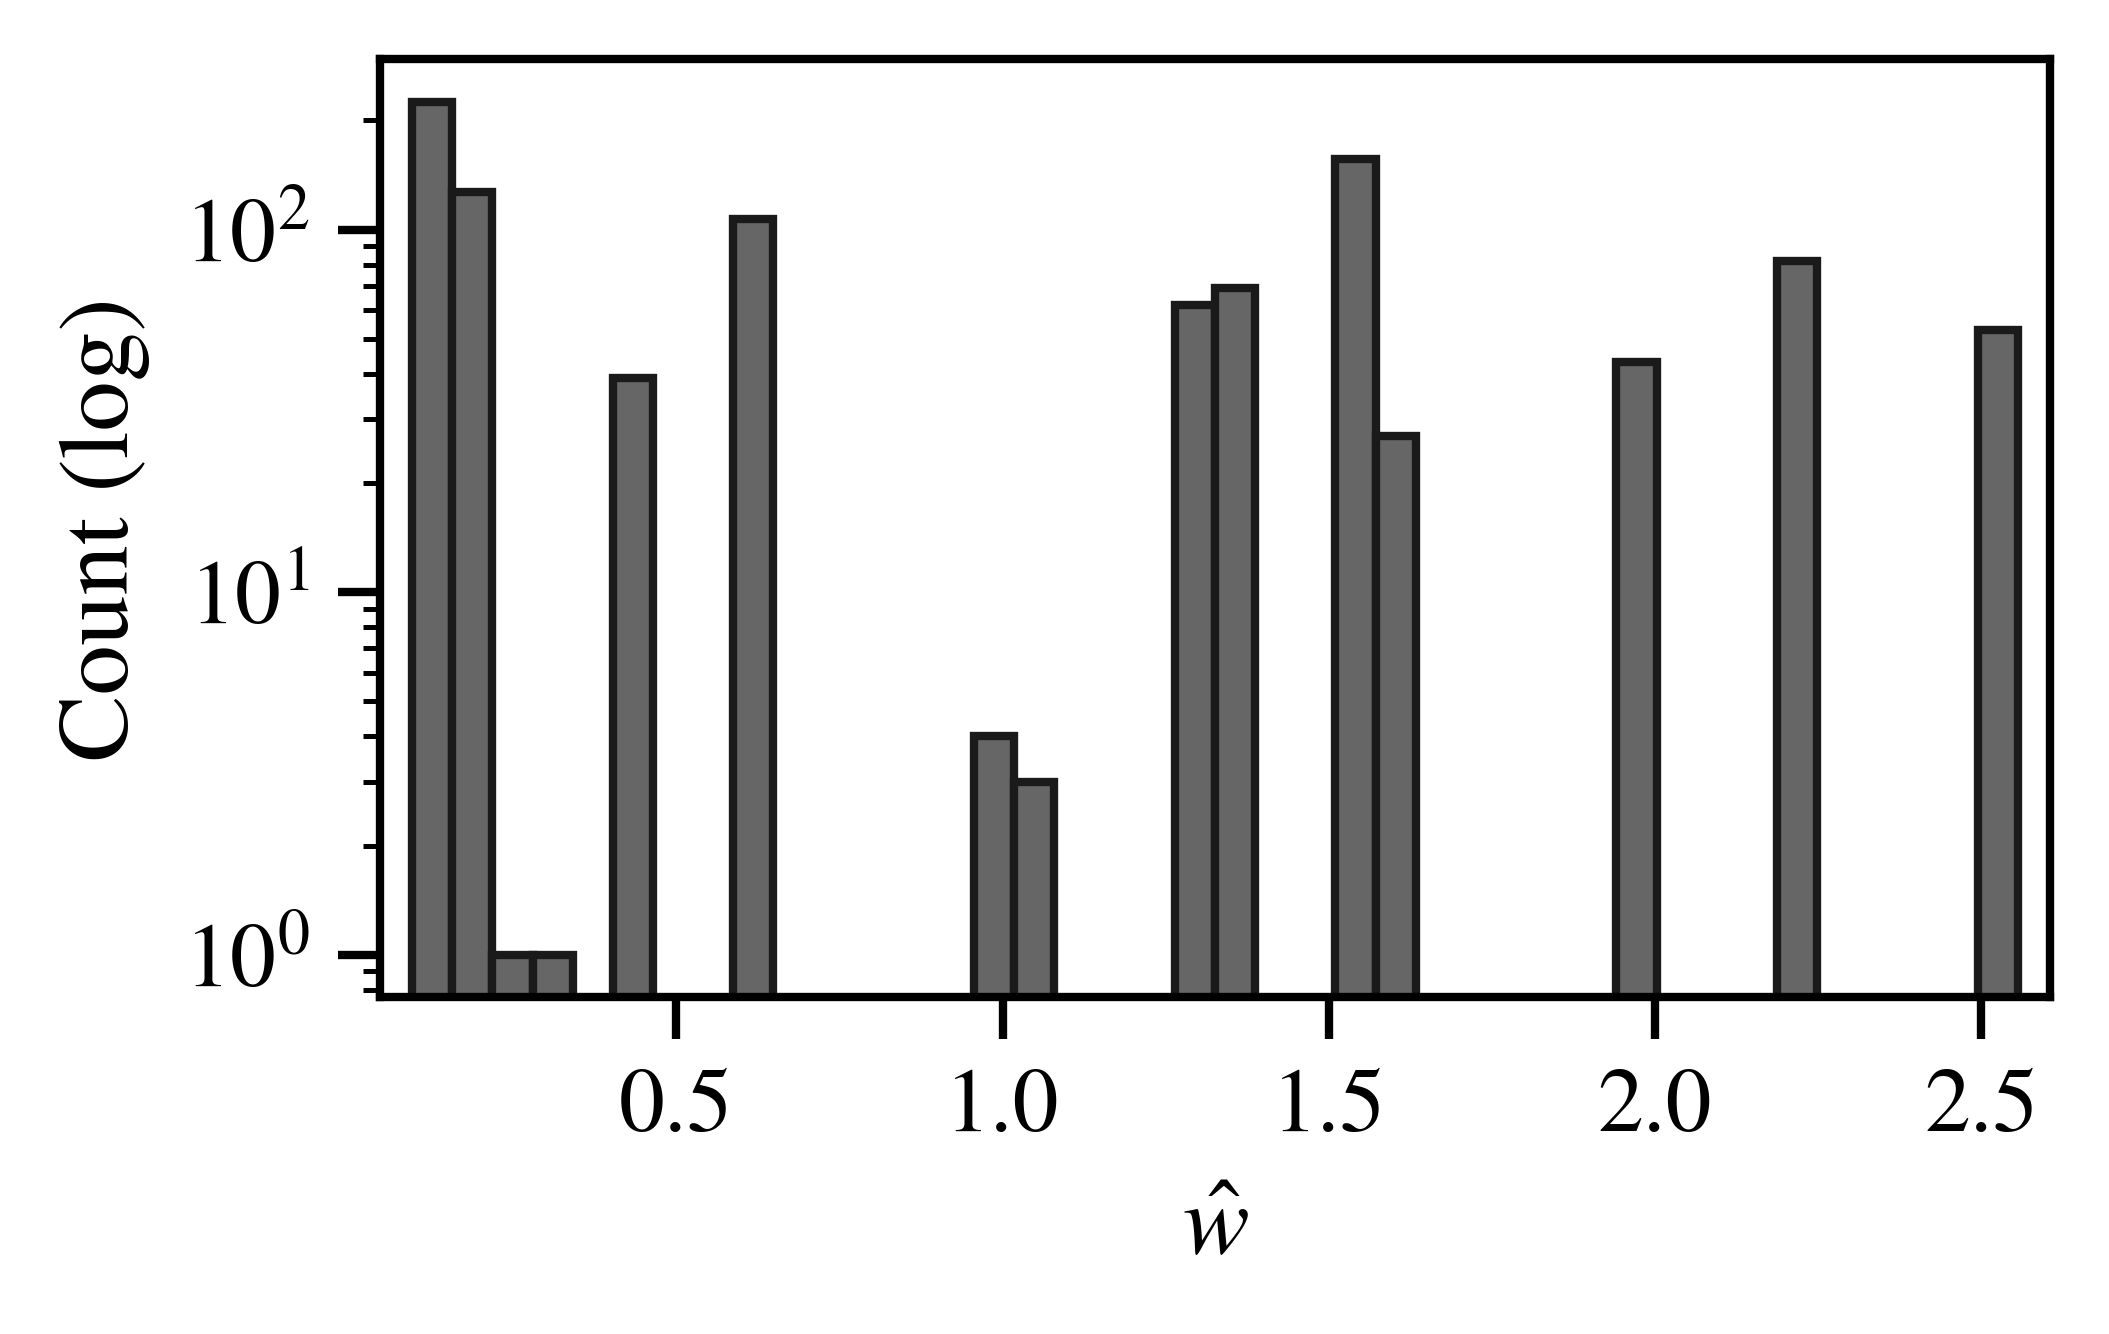

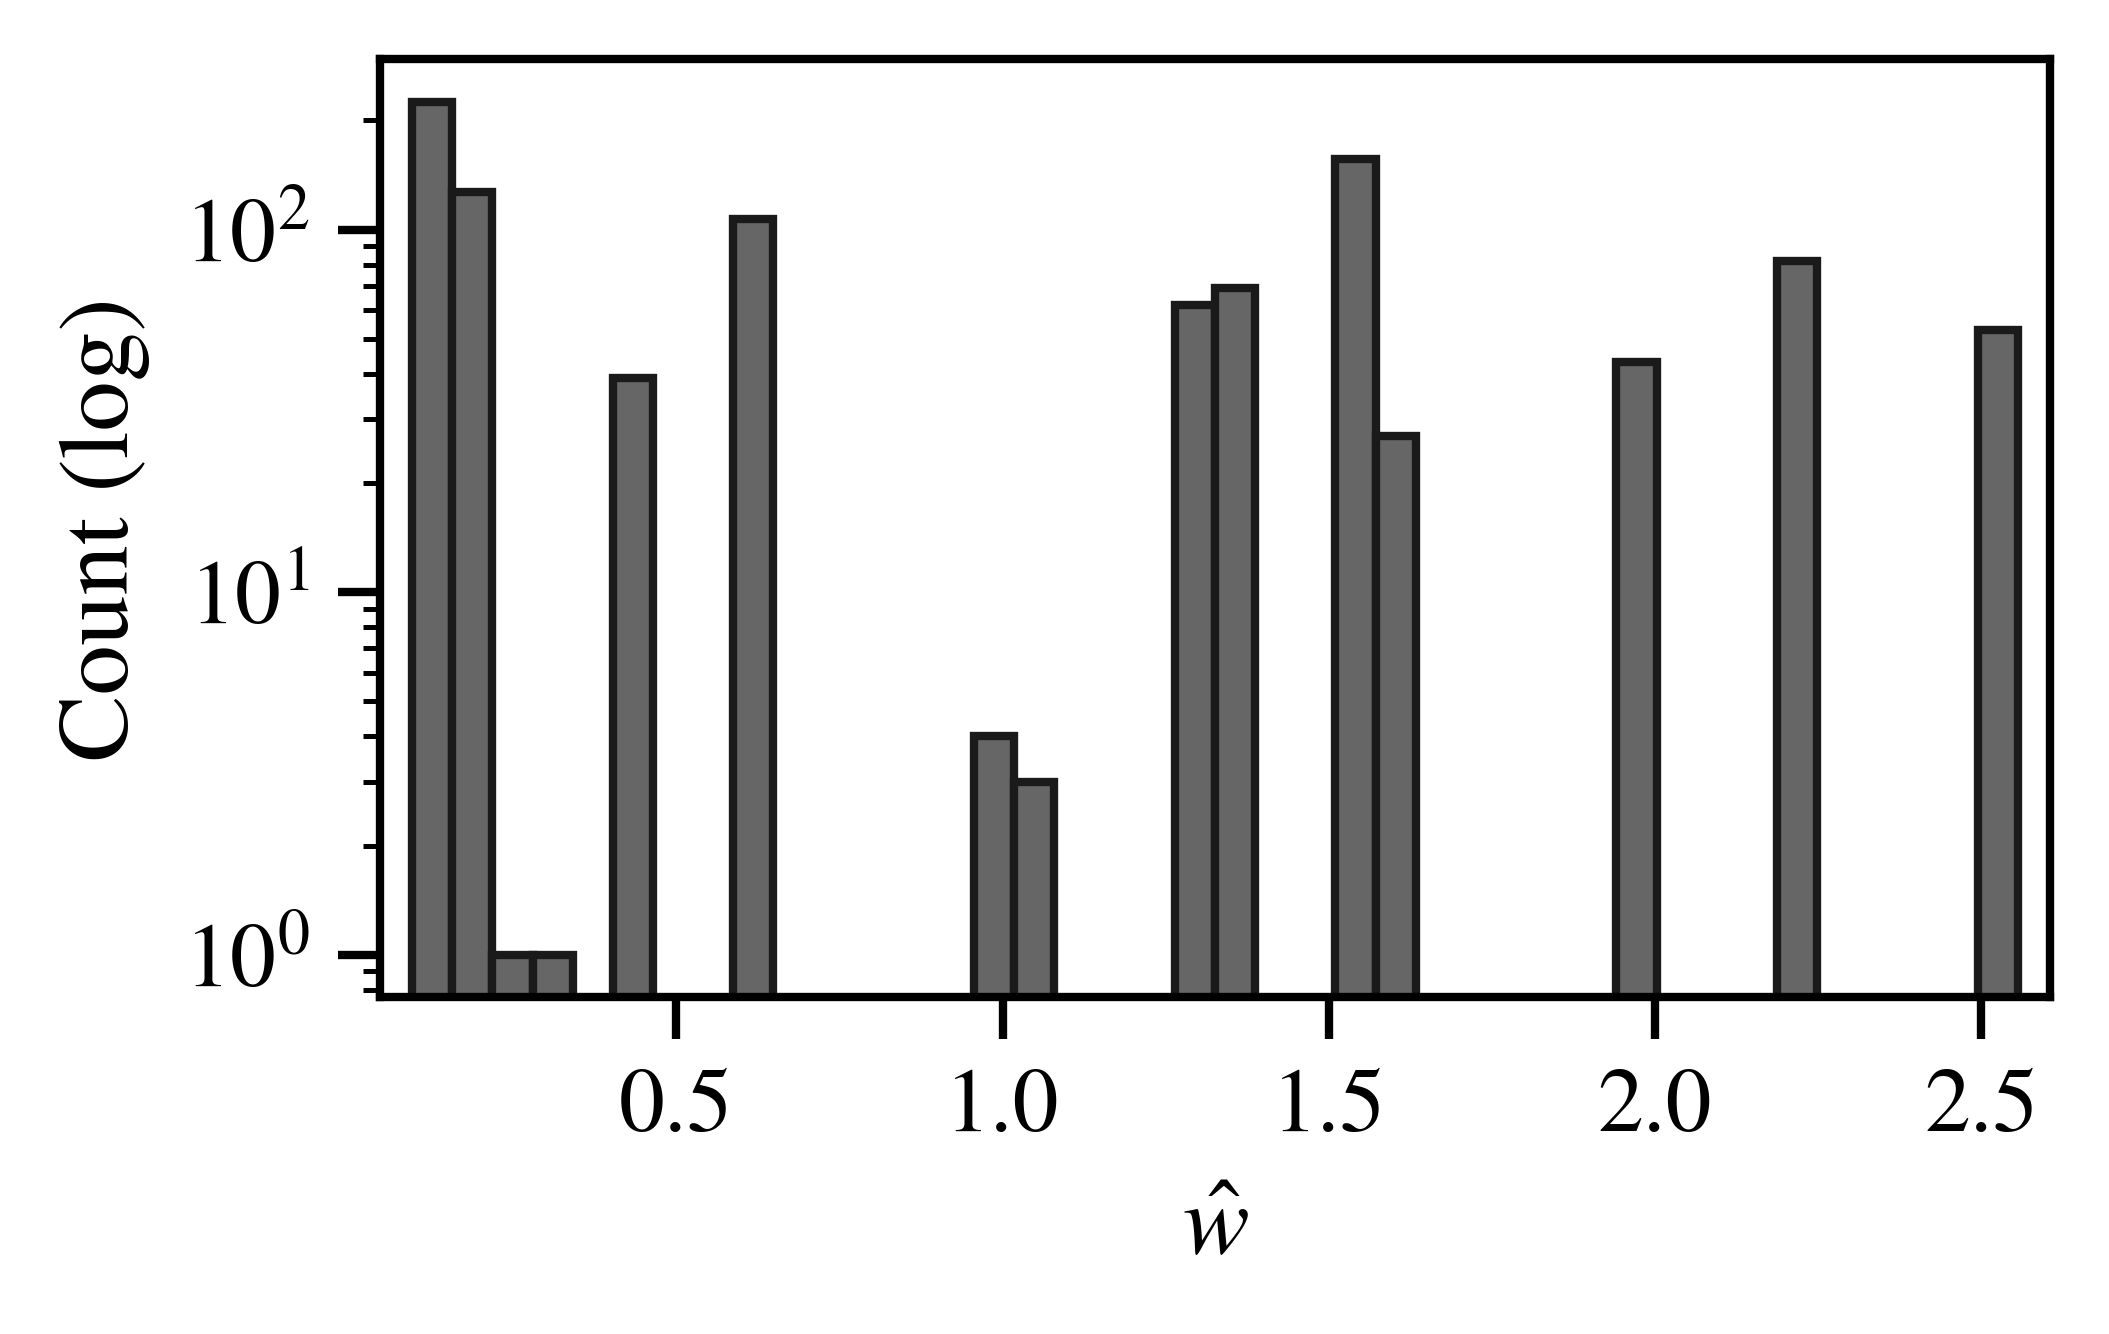

In [4]:
weights = (
    benchmark.target_policy.action_prob(dataset.contexts, dataset.actions)
    / dataset.behavior_action_probs
)
fig_w = report.plot_importance_weights(weights, logy=True)
fig_w

In [5]:
output_dir = Path("docs/assets/figures")
output_dir.mkdir(parents=True, exist_ok=True)
save_figure(fig, output_dir / "quickstart_bandit_estimator_comparison")
save_figure(fig_w, output_dir / "quickstart_bandit_weights")

{'pdf': 'docs/assets/figures/quickstart_bandit_weights.pdf',
 'png': 'docs/assets/figures/quickstart_bandit_weights.png'}

## Takeaways

- IS is unbiased but can be noisy; WIS trades bias for stability.
- Double RL can outperform if the outcome model fits well.
- Always sanity-check weight diagnostics before trusting estimates.